<a href="https://colab.research.google.com/github/IfrazQazi/Appliances-Energy-Prediction-Capstone_Project/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Email Campaign Effectiveness Prediction**

#**Problem Statement**
##Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

In [29]:
#importing library
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import scipy.stats as stat
import pylab
import missingno as mno


%matplotlib inline 

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
email_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Email campaign Effectiveness/data_email_campaign.csv')

In [33]:
# head of dataframe
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [34]:
email_df.tail()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0
68352,EMA00089999316900,1,1.5,1,G,2,20.0,2,1038,6.0,0.0,0


#**The data has the following features:**
##**Email_ID** - This column contains the email ids of individuals.

##**Email_type** - Email type contains 2 categories 1 and 2. We can assume that the types are like promotional email or sales email.

##**Subject_Hotness_Score** - It is the subject-line effectiveness score.

##**Email_Source** - It represents the source of the email like sales,marketing or product type email.

##**Email_Campaign_Type** - Campaign type

##**Total_Past_Communications** - This column contains the previous mails from the source.

##**Customer_Location** - Categorical data which explains the different demographic location of the customers.

##**Time_Email_sent_Category** - It has 3 categories: 1,2 and 3 which are considered as morning,evening and night time slot.

##**Word_Count** - It contains the no.of words in the mail.

##**Total_Links** - Total links in the email body.

##**Total_Images** - The banner images in the email body.

##**Email_Status** - It is the target variable which contains the characterization of the mail that is ignored; read; acknowledged by the reader.

In [35]:
email_df.shape

(68353, 12)

## Here we can see that this data set is consist of 12 columns/features and 68353 rows/observation

In [36]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


## here we can see that in this data set there is 2 object data type columns and all other columns are numeric data type
## and some column also contains null values

In [37]:
# lets see Email_ID colum
email_df['Email_ID'].count()

68353

##here we can see that Email_ID feature is having 68353 unique values and number of observation is also 68353 so we can drop that feature from our data set

In [38]:
email_df.isnull().any()

Email_ID                     False
Email_Type                   False
Subject_Hotness_Score        False
Email_Source_Type            False
Customer_Location             True
Email_Campaign_Type          False
Total_Past_Communications     True
Time_Email_sent_Category     False
Word_Count                   False
Total_Links                   True
Total_Images                  True
Email_Status                 False
dtype: bool

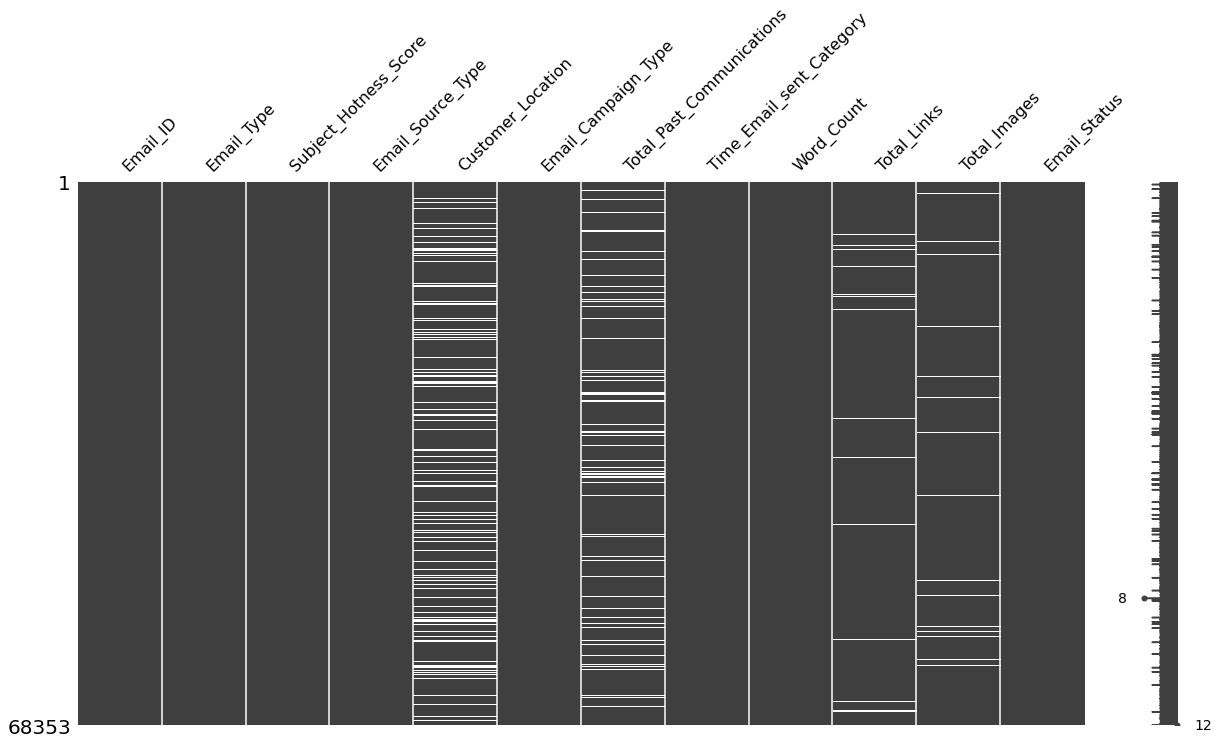

In [39]:
# missing value
mno.matrix(email_df, figsize = (20, 10))

In [40]:
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

## We can see that 4 columns is having null
## Customer_Location is having 11595 null values
## Total_Past_Communications is having 6825 null values
## Total_Links is having 2201 null values
## Total_Images is having 1677 null values
##But particularly customer location has a lot of them. Since it is a categorical column and it is difficult to just impute them with our understanding of where the customer's location is, we'll see how much it affects our target variable, whether a particular location has anything to do with it or it is not correlated at all and accordingly we can decide on it later on. Let's fill up the null values in other columns. 

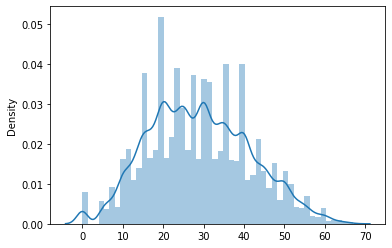

In [41]:
#let's see the distribution of Total Past Communications to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=email_df['Total_Past_Communications'], hist = True)

##We have kind of a normal ditribution for Total Past Communications and it will be fine, if we use mean to fill up the null values of this column.

In [42]:
#filling up the null values for total past comm
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(), inplace = True)

##Now lets find out which method we should use to fill missing values of Total_Links column

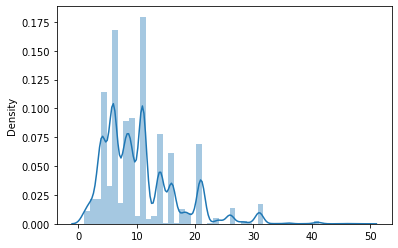

In [43]:
#let's see the distribution of Total Links to get what majority of the data tends to so that we can fill it accordingly
sns.distplot(x=email_df['Total_Links'], hist= True)

##It seems like most of the values of the Total Links in the column are between 0-10 and the distribution is skewed on the right. Mode is more robust to outlier effect.

In [44]:
#filling up the Total Links Column
email_df['Total_Links'].fillna(email_df['Total_Links'].mode()[0], inplace = True)

##Now lets find out which metrics we should use to fill missing values of Total_Images column

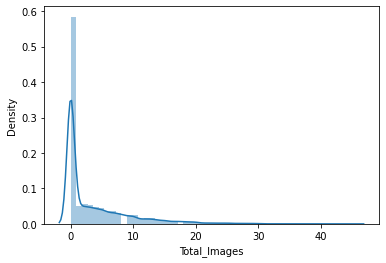

In [45]:
sns.distplot(email_df.Total_Images)

##The number of images in most of the emails seems to be 0 or fewer than 3-4. It would be wise to fill the null values with mode values.

In [46]:
#filling up the Total Images Column
email_df['Total_Images'].fillna(email_df['Total_Images'].mode()[0], inplace = True)

In [47]:
#check for duplicates
email_df.duplicated().sum()

0

##Hence, we can observe that there are no duplications of data.

##**Exploratory Data Analysis:**
##Exploratory data analysis is an important part of data analysis. It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

##We will explore every feature against our target variable and analyze it's influence on it.

In [48]:
#creating new dataframe of only categorical columns
categorical_variables = email_df.select_dtypes(include =['object','int']).copy()
#dropping Word_Count because it's numeric data
categorical_variables.drop('Word_Count',axis=1,inplace=True)

In [49]:
ds_cat_stats = pd.DataFrame(columns = ['Column', 'Values', 'Total Count', 'Total_COunt_Excluding_Null', 
                                       'Missing Value', 'Missing %'])
tmp = pd.DataFrame()

for c in categorical_variables.columns:
    tmp['Column'] = [c]
    tmp['Values'] = [categorical_variables[c].unique()]
    tmp['Total Count'] = len(list(categorical_variables[c].unique()))
    tmp['Total_COunt_Excluding_Null'] = int(categorical_variables[c].nunique())
    tmp['Missing Value'] = categorical_variables[c].isnull().sum()
    tmp['Missing %'] = (categorical_variables[c].isnull().sum()/ len(categorical_variables)).round(3)*100
    ds_cat_stats = ds_cat_stats.append(tmp)
    
ds_cat_stats

,Column,Values,Total Count,Total_COunt_Excluding_Null,Missing Value,Missing %
0,Email_ID,"[EMA00081000034500, EMA00081000045360, EMA0008...",68353,68353,0,0.0
0,Email_Type,"[1, 2]",2,2,0,0.0
0,Email_Source_Type,"[2, 1]",2,2,0,0.0
0,Customer_Location,"[E, nan, B, C, G, D, F, A]",8,7,11595,17.0
0,Email_Campaign_Type,"[2, 3, 1]",3,3,0,0.0
0,Time_Email_sent_Category,"[1, 2, 3]",3,3,0,0.0
0,Email_Status,"[0, 1, 2]",3,3,0,0.0


#**Observation:**
* As we can see we have 17% missing values in Customer Location.

* There is no missing values in any other categorical variable.

* Email_Type and Email_Source_Type have 2 categories.

* Email_Campaign_Type,Time_Email_sent_Category and Email_Status have 3 Categories

* Look at the Variable 'Customer_Location' -- distinct categories are 8 but without nans it is 7.

In [50]:
email_df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

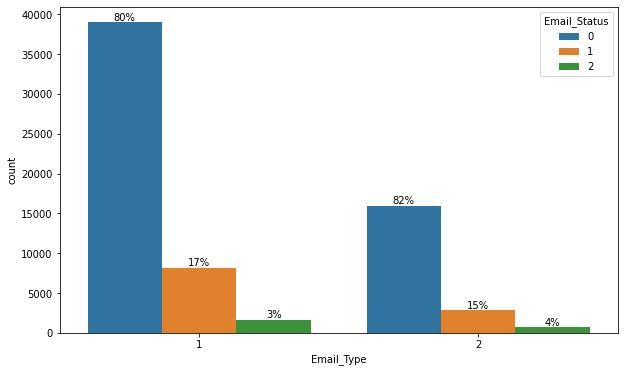

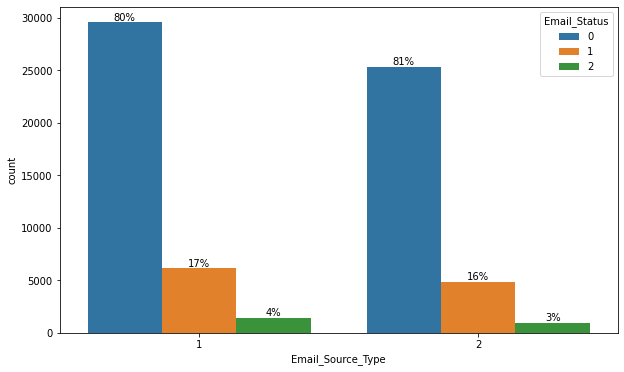

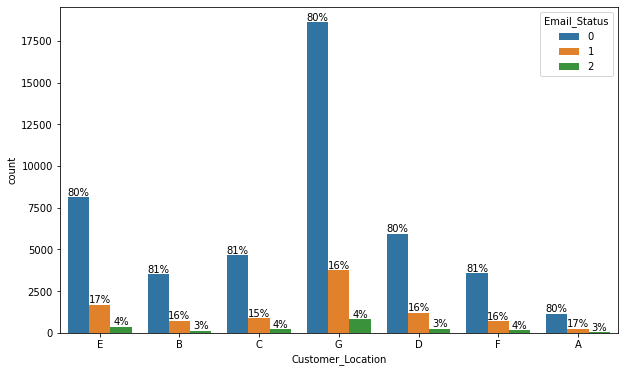

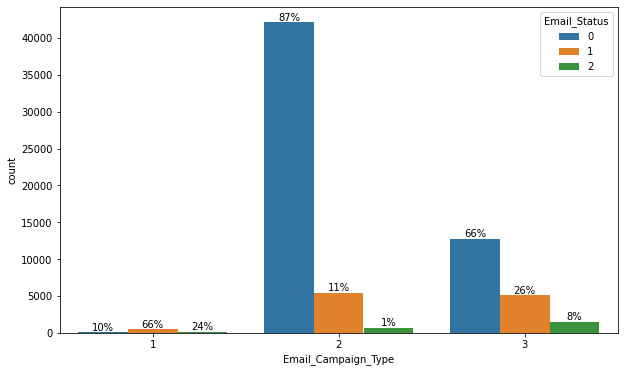

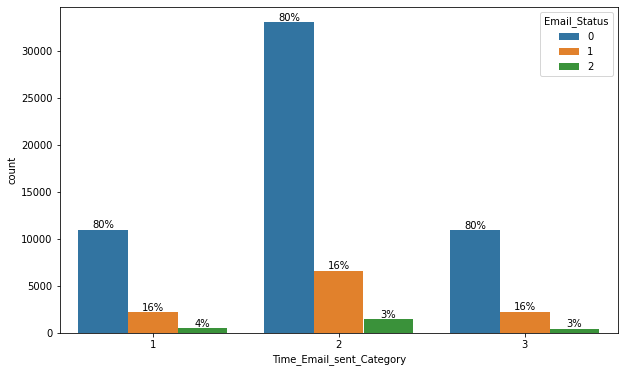

In [51]:

categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
Target_var = ['Email_Status']
plt.figure(figsize=(10, 6))
for i,value in enumerate(categorical_variables):
  plt.figure(figsize=(10, 6))
  ax = sns.countplot(x=email_df[value], hue=email_df[Target_var[0]])
  unique = len([x for x in email_df[value].unique() if x==x])
  bars = ax.patches
  
  for i in range(unique):
      
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  
  plt.show()


##**Observation:**

* The email type 1 which may be considered as promotional emails are sent more than email type 2 and hence are read and acknowledged more than the other type otherwise the proportion of ignored, read, acknowledged emails are kind of same in both email types.

* Email source type shows kind of a similar pattern for both the categories.

* In the customer location feature we can find that irrespective of the location, the percentage ratio of emails being ignored, read and acknowledge are kind of similar. It does not exclusively influence our target variable. It would be better to not consider location as factor in people ignoring, reading or acknowledging our emails. Other factors should be responsible in why people are ignoring the emails not location.

* In the Email Campaign Type feature, it seems like in campaign type 1 very few emails were sent but has a very high likelihood of getting read. Most emails were sent under email campaign type 2 and most ignored. Seems like campaign 3 was a success as even when less number of emails were sent under campaign 3, more emails were read and acknowledged.

* If we consider 1 annd 3 as morning and night category in time email sent feature, it is obvious to think 2 as middle of the day and as expected there were more emails sent under 2nd category than either of the others, sending emails in the middle of the day could lead to reading and opening the email as people are generally working at that time and they frequently checkup their emails, but it cannot be considered as the major factor in leading to acknowledged emails.


## As we can see irrespective of location the ratio of **Email_Status** is same throughout .So we can drop the location column

In [52]:
#dropping Customer_Location column
email_df.drop('Customer_Location',inplace=True,axis=1)
print('Shape of data after dropping ',email_df.shape)

Shape of data after dropping  (68353, 11)


In [53]:
email_df.isna().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

## So now we don't have any null values in our data set

##**Analysis of Numerical Data**

In [54]:

#creating new dataframe of only numerical columns
ds_num = email_df.select_dtypes(include =['float']).copy()
ds_num['Word_Count'] = email_df.loc[ds_num.index, 'Word_Count'].copy()
ds_num.head()

,Subject_Hotness_Score,Total_Past_Communications,Total_Links,Total_Images,Word_Count
0,2.2,33.0,8.0,0.0,440
1,2.1,15.0,5.0,0.0,504
2,0.1,36.0,5.0,0.0,962
3,3.0,25.0,16.0,0.0,610
4,0.0,18.0,4.0,0.0,947


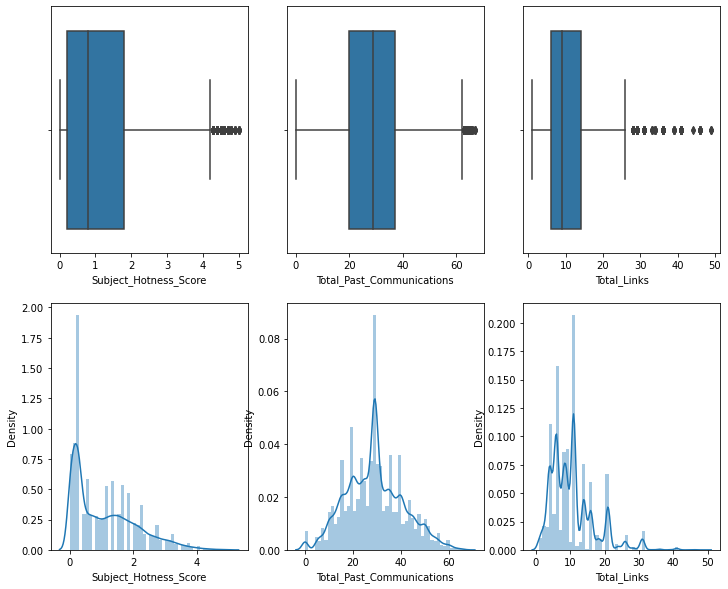

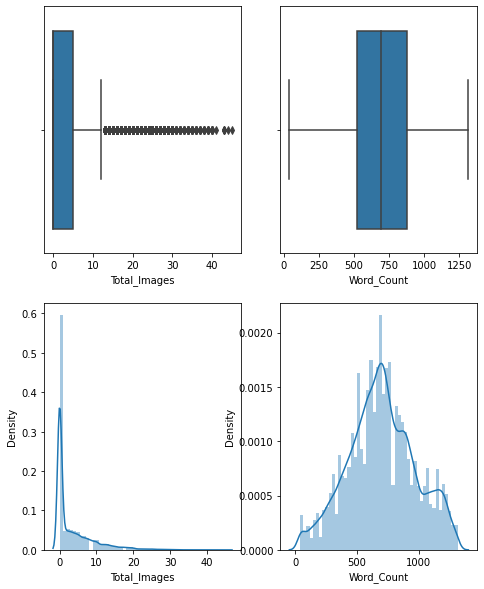

In [55]:
ix = 1
fig = plt.figure(figsize = (12,10))
for c in list(ds_num.columns):
    if ix <= 3:
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data = ds_num, x=c, ax = ax1)
            ax2 = fig.add_subplot(2,3,ix+3)
            sns.distplot(ds_num[c], ax=ax2)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (12,10))
        ix =1

##We already saw the distribution plots of Total Links, Total Images and Total Past Communications earlier. Here we see that Word Count just as Total Past Communications has a normal distribution. All of the rest are rightly skewed which indicates the presence of outliers.

##Lets look at the relationship between the dependent variable and independent variable. In order to do that let's add our dependent variable to this dataset.

In [56]:
# add Traget variable
ds_num['Email_Status'] = email_df.loc[ds_num.index, 'Email_Status'].copy()

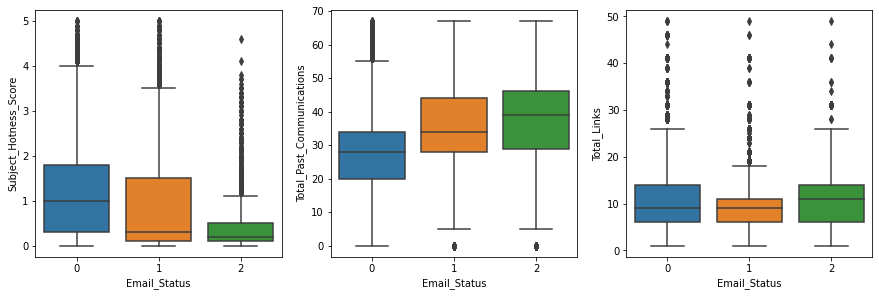

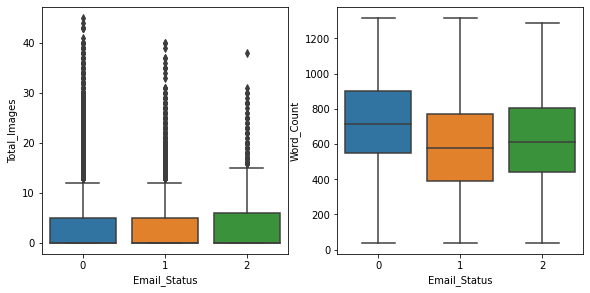

<Figure size 1080x720 with 0 Axes>

In [57]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(ds_num.columns):
    if ix <= 3:
        if c != 'Email_Status':
            ax1 = fig.add_subplot(2,3,ix)
            sns.boxplot(data=ds_num, x='Email_Status', y=c, ax=ax1)        
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

##**Observation:**

* In the subject hotness score, median of ignored emails was around 1 with a few outliers. Acknowledged emails has the most outliers. It is observed that the Subject_Hotness_Score for read and acknowledged emails are much lower.
* Analyzing total past communications, we can see that the more the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

* The more the words in an email, the more it has a tendency to get ignored. Too lengthy emails are getting ignored.

* The median is kind of similar in all of the three cases in total links feature with a number of outliers.

* More images were there in ignored emails.

* There are considerable number of outliers in Subject_Hotness_Score, Total_Links and Total_Images.



##**Correlation**: To get an understanding of how much correlated, positively or negatively our features is with our target variable, we will be creating a correlation matrix.

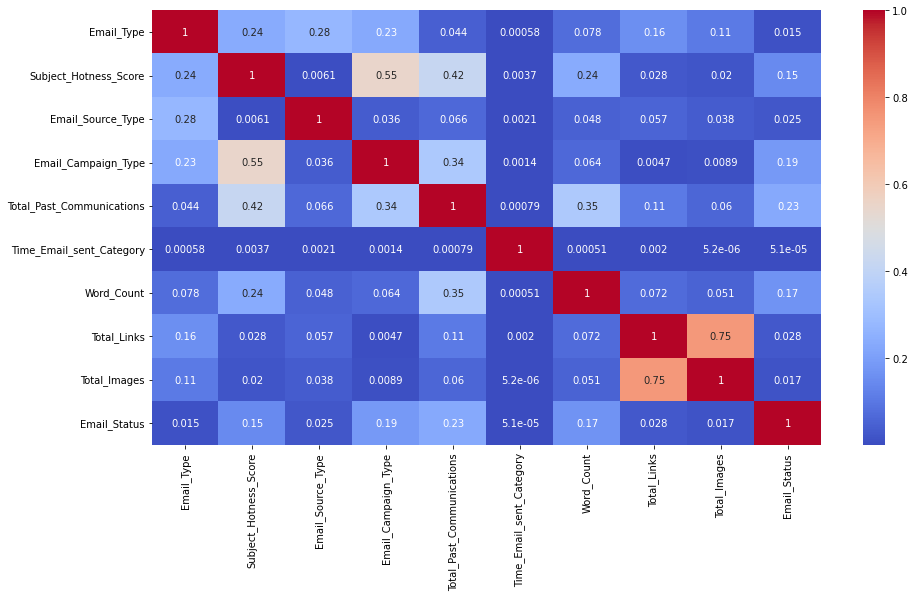

In [58]:
## Correlation
plt.figure(figsize=(15,8))
correlation = email_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##**observation:**
 We can see multicollinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.